# **Homework 2-Steam Reviews 2021**
## **Research Questions**

### [RQ1] Exploratory data analysis


### [RQ2]

In [ ]:
import pandas as pd
dataset = pd.read_csv('./steam_reviews.csv', header='infer', nrows=1000)

In [ ]:
dataset.groupby('app_name').review.count()

### [RQ3]

In [122]:
import pandas as pd

In [123]:
# We will use the parser seen during lectures 
def dateparse(time_in_secs):
    return pd.to_datetime(time_in_secs, unit='s')

In [124]:
steam_small = pd.read_csv('C:/Users/Filippo/Desktop/università/ADM/steam_reviews.csv',header='infer',parse_dates=['timestamp_created','timestamp_updated', 'author.last_played'],date_parser=dateparse)

In [125]:
# With a simple query we isolate the feature we need, excluding the date part and with value_counts() we group the creation variable
creation = steam_small.timestamp_created.dt.time
print("most common time of writing:",creation.value_counts().index[0],"\nnumber of occurrences:", creation.value_counts()[0])

most common time of writing: 15:54:53 
number of occurrences: 583


In [126]:
def rev_counts(time_intervals):
    # First we ccreate the variable of interest
    hours = steam_small.timestamp_created.dt.hour
    # Then a long procedure to engineer the input: parse, extract hours and sort. At last we append 24 to include reviews written between 8 pm and 12 pm
    time_intervals = pd.Series(time_intervals)
    time_intervals = pd.to_datetime(time_intervals,infer_datetime_format=True)
    time_intervals = time_intervals.dt.hour
    time_intervals = sorted(time_intervals)
    time_intervals.append(24)
    # We then bin the variable of interest with the newly created bins, group the results and plot 
    bins = pd.cut(hours,time_intervals)
    return bins.value_counts(sort=False).plot(kind='bar',title='Number of reviews by time interval',colormap='plasma',grid=True,rot=45)
    

<AxesSubplot:title={'center':'Number of reviews by time interval'}>

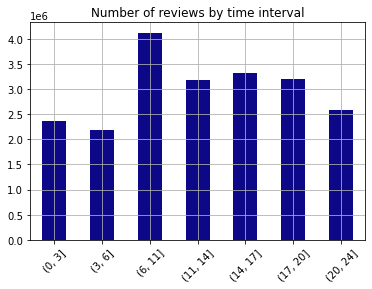

In [127]:
times = ['06:00:00','11:00:00','14:00:00','17:00:00','20:00:00','00:00:00','03:00:00']
rev_counts(times)

### [RQ4]